In [3]:
!pip install pandas


  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/87/03/fe50521919aa981f6a1c197037da4623a267b0e5f42246d69ba048e86da3/pandas-2.2.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for numpy<2,>=1.26.0 from https://files.pythonhosted.org/packages/ad/11/52fbe97fd84c91105b651d25a122f8deed6d3519afb14f9771fac1c9b7de/numpy-1.26.3-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.2 kB ? eta -:--:--
     ------------------------- ------------ 41.0/61.2 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 61.2/61.2 kB 809.0 kB/s eta 0:00:00
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tzdata>=2022.7 from ht


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

C:\Users\HP\AppData\Local\Temp\ipykernel_14744\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
!pip install matplotlib


In [18]:
import matplotlib
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('spotify-2023.csv', encoding = 'ISO-8859-1')

In [6]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### 1.Пропущенные значения

In [8]:
missing_values = df.isnull().sum()

In [9]:
print("Количество пропущенных значений в каждой категории\n")
print(missing_values)

Количество пропущенных значений в каждой категории

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


### 2.Уникальные значения

In [10]:
uniq_val_categ = df.select_dtypes(include='object').nunique()

In [11]:
print("Количество уникальных значений в каждой категории\n")
print(uniq_val_categ)

Количество уникальных значений в каждой категории

track_name             943
artist(s)_name         645
streams                949
in_deezer_playlists    348
in_shazam_charts       198
key                     11
mode                     2
dtype: int64


In [14]:
num_columns = df.select_dtypes(include='number')

Распределение выпуска песен относительно месяцев года:


Text(0, 0.5, 'Количество выпущенных песен')

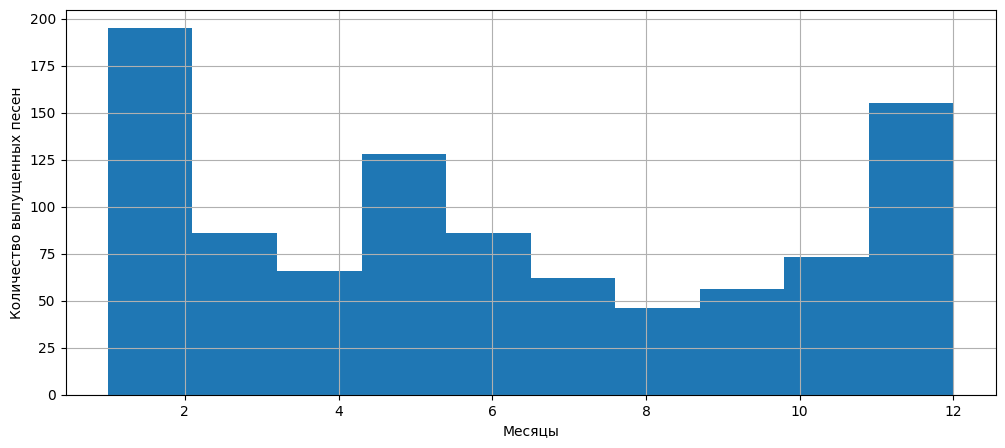

In [25]:
print("Распределение выпуска песен относительно месяцев года:")
h = num_columns['released_month'].hist(figsize=(12, 5))
plt.xlabel("Месяцы")
plt.ylabel("Количество выпущенных песен")

### 3. Селекты (5 шт)

In [34]:
df_select_1 = df[df['released_year']== 1999] 
print('Песни, выпущенные в 1999:')
print(df_select_1.loc[:, ["track_name", "artist(s)_name"]])

Песни, выпущенные в 1999:
           track_name       artist(s)_name
65             Yellow        Chris Molitor
649      Still D.R.E.  Dr. Dre, Snoop Dogg
653  The Next Episode  Dr. Dre, Snoop Dogg
669  Forgot About Dre      Eminem, Dr. Dre
673              Stan         Eminem, Dido


Выводы1: Среди самых прослушиваемых песен за 2023 год, выпущенных в 1999 год вошли 5 песен : Yellow, Still D.R.E., The Next Episode, Forgot About Dre, Stan.

In [38]:
df_select_2 = df[df['artist(s)_name']== 'Taylor Swift'] 
print('Исполнитель - Тейлор Свифт - песни и год релиза:')
print(df_select_2.loc[:, ["track_name", "released_year"]])

Исполнитель - Тейлор Свифт - песни и год релиза:
                                            track_name  released_year
3                                         Cruel Summer           2019
21   I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...           2023
33                                           Anti-Hero           2022
37                                         Blank Space           2014
38                                               Style           2014
59                                            cardigan           2020
66                                               Karma           2022
69                        Enchanted (Taylor's Version)           2023
83                 Back To December (Taylor's Version)           2023
93                                    Donï¿½ï¿½ï¿½t Bl           2017
100                                              Lover           2012
113                            Mine (Taylor's Version)           2023
119                                      

Выводы2: Если присмотреться к данным, можно сделать вывод, что самым ранним популярным треком Тейлор Свифт является Enchanted (2010).  А за 2023 год часто прослушивали 6 различных треков. А наиболее продуктивным годом на "популярные треки" является 2022 год - 16 треков.

In [40]:
df_select_3 = df[df['artist(s)_name']== 'The Weeknd'] 
print('Исполнитель - The Weeknd, песня и процент её позитивности: ')
print(df_select_3.loc[:, ["track_name", "valence_%"]])

Исполнитель - The Weeknd, песня и процент её позитивности: 
                     track_name  valence_%
47                  Die For You         51
55              Blinding Lights         38
164             Save Your Tears         61
175                    Reminder         40
292            Call Out My Name         17
325                   The Hills         12
371                 After Hours         16
501                   Sacrifice         91
502      Is There Someone Else?         60
504                 Out of Time         82
508  How Do I Make You Love Me?         62
509                    Gasoline         35
511              Less Than Zero         50
512              Take My Breath         35
515                Best Friends         49
521                     Dawn FM         10
523                 Starry Eyes         13
538      Donï¿½ï¿½ï¿½t Break My         25
541            A Tale By Quincy         55
552   Every Angel is Terrifying         52
577       Phantom Regret by Jim      

In [ ]:
Вывод3: на основе данных делаем выводы, что:
Самая позитивная песня The Weeknd - Sacrifice,
Менее популярная песня - Dawn FM.

In [44]:
df_select_4 = df[df['artist(s)_name'].str.contains('Jung Kook')]
print('Исполнитель - Jung Kook, песня и процент её "танцевальности": ')
print(df_select_4.loc[:, ["track_name", "danceability_%"]])

Исполнитель - Jung Kook, песня и процент её "танцевальности": 
                                            track_name  danceability_%
0                  Seven (feat. Latto) (Explicit Ver.)              80
62             Left and Right (Feat. Jung Kook of BTS)              88
94                                      Still With You              53
396  Dreamers [Music from the FIFA World Cup Qatar ...              71
650                     Stay Alive (Prod. SUGA of BTS)              51


Вывод4: из 5 песен, которые исполняет Чонгук - 3 песни можно назвать очень танцевальными. А две средне - танцевальными.

In [61]:
df_select_5 =df[(df['released_month'] == 10) & (df['released_day'] == 1) ]
print(df_select_5.loc[:, ["track_name", "artist(s)_name", "released_year"]])

    track_name artist(s)_name  released_year
602  The Feels          TWICE           2021


Вывод5: The Feels (TWICE) - песня была выпущена 1 октября 2021 года.

### 4.Агрегирующие запросы

In [52]:
min_rel_year = df['released_year'].min()
print("Самый ранний год релиза песни:")
print(min_rel_year)

Самый ранний год релиза песни:
1930


In [56]:
avg = df['valence_%'].mean()
print("Среднее значение по позитивности песни:")
print(avg)


Среднее значение по позитивности песни:
51.43126967471144


In [57]:
summary_artist = df.groupby('artist(s)_name').agg({'track_name': 'count'})
print("Количество песен, спетых определнным исполнителем:")
print(summary_artist)

Количество песен, спетых определнным исполнителем:
                                               track_name
artist(s)_name                                           
(G)I-DLE                                                2
21 Savage, Gunna                                        1
24kgoldn, Iann Dior                                     1
50 Cent                                                 1
A$AP Rocky, Metro Boomin, Roisee                        1
...                                                   ...
j-hope                                                  1
j-hope, J. Cole                                         1
sped up 8282                                            1
sped up nightcore, ARIZONATEARS, Lil Uzi Vert           1
teto                                                    1

[645 rows x 1 columns]


In [59]:
summary_rel_year = df.groupby('released_year').agg({'track_name': 'count'})
print("Количество песен, выпущенных в каждый год:")
print(summary_rel_year)

Количество песен, выпущенных в каждый год:
               track_name
released_year            
1930                    1
1942                    1
1946                    1
1950                    1
1952                    1
1957                    2
1958                    3
1959                    2
1963                    3
1968                    1
1970                    2
1971                    1
1973                    1
1975                    2
1979                    1
1982                    2
1983                    1
1984                    4
1985                    2
1986                    2
1987                    1
1991                    2
1992                    1
1994                    1
1995                    2
1996                    1
1997                    1
1998                    1
1999                    5
2000                    4
2002                    6
2003                    2
2004                    4
2005                    1
2007                 

### 5.Выводы:

1) В данном датасете количество пропущенных значений в каждой категории - незначительно. Данный вывод можно сделать, основываясь на том, что только в двух категориях (из 24) присутствуют пропущенные значения. Я считаю, что для анализа датасета данные из этих столбцов - маловажны.

2) Изучили переменные: посмотрели на уникальные значения, их количество для категориальных переменных, построили гистограмму для числовых переменных.
   Рассмотрев гистограмму ("Распределение выпуска песен относительно месяцев года"), делаем вывод, что чаще всего песни выпускают в первый месяц года (январь), на втором месте - 12 месяц (декабрь). Скорее всего это связано с наличием праздников в этот период - Рождество и  Новый год.

3) По данному пункту расписали отдельные выводы под каждым отдельным селектом.

4) Самый ранний год релиза песни, вошедший в топ прослушиваемых на спотифай:1930

   В 2022 году было больше всего выпущено уникальных и популярных песен.

Общий вывод по датасету:

Общий вывод основывается на проведенном анализе датасета и сделанных выводах. В целом, можно сказать, что данные в датасете достаточно полные, поскольку количество пропущенных значений незначительно, особенно учитывая, что только в двух из 24 категорий присутствуют пропуски. Поэтому для основного анализа датасета эти пропуски, вероятно, не являются критическими.

Анализ переменных позволил выделить интересные тренды. Например, гистограмма распределения выпуска песен относительно месяцев года указывает на то, что январь и декабрь являются наиболее популярными месяцами для выпуска песен, возможно, из-за праздников в этот период.

Также, уточнив информацию о самом раннем годе релиза песни в топе на Spotify (1930) и отметив, что в 2022 году было выпущено больше всего уникальных и популярных песен, можно сделать общий вывод о разнообразии и динамике в мире музыки.

В целом, датасет предоставляет информацию о различных аспектах музыкальной индустрии, и его анализ позволяет выделить интересные тенденции и закономерности в выпуске и популярности песен.